In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Data Cleaning, Feature Creation, Test-Train Split

In [98]:
dat=pd.read_csv('/home/maria/Documents/DataScienceProjects/data/Turbine_Data.csv',parse_dates=['Unnamed: 0'], index_col=['Unnamed: 0'])

In [99]:
#Drop rows with missing information
dat=dat.dropna()

In [100]:
#Check if there are columns that stay constant throughout the dataset
dat.nunique()

ActivePower                     32281
AmbientTemperatue               32723
BearingShaftTemperature         32712
Blade1PitchAngle                30077
Blade2PitchAngle                30116
Blade3PitchAngle                30116
ControlBoxTemperature               1
GearboxBearingTemperature       32712
GearboxOilTemperature           32724
GeneratorRPM                    31967
GeneratorWinding1Temperature    32724
GeneratorWinding2Temperature    32721
HubTemperature                  20358
MainBoxTemperature              26980
NacellePosition                  3950
ReactivePower                   32282
RotorRPM                        30844
TurbineStatus                     271
WTG                                 1
WindDirection                    3950
WindSpeed                       32722
dtype: int64

In [101]:
dat.drop(['WTG', 'ControlBoxTemperature'], axis=1, inplace=True)

In [102]:
dat.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
2019-05-06 14:10:00+00:00,-7.851491,39.308243,47.154927,45.736893,43.699357,43.699357,58.852308,56.782879,68.210284,62.792258,62.145290,46.003815,49.171875,44.80,-15.007223,0.672715,2.0,44.80,2.212693
2019-05-06 14:30:00+00:00,-5.565284,39.206277,40.058399,41.260297,41.260230,41.260230,48.911180,56.033333,68.229411,61.747975,61.282616,40.253338,44.515622,49.00,-10.851533,0.508198,2.0,49.00,2.130019
2019-05-06 14:50:00+00:00,-5.549332,39.194184,46.500652,39.576077,39.576122,39.576122,56.859428,55.873937,85.012009,60.785716,60.362536,46.003815,51.624993,61.50,-10.303578,0.715614,2.0,61.50,2.347810
2019-05-06 15:00:00+00:00,-5.768376,38.992667,46.419196,47.399521,48.299502,48.299502,56.761226,55.807661,63.945036,60.277575,59.855694,46.004238,51.900000,93.25,-12.594477,0.550434,129.0,93.25,2.161460
2019-05-06 15:10:00+00:00,-5.091456,38.686212,46.280597,50.363603,50.363691,50.363691,56.483241,55.451512,21.339981,60.004809,59.567618,46.007880,52.112507,138.50,-11.181515,0.251628,282.0,138.50,1.913490


In [103]:
dat=dat[dat['ActivePower']>0]
dat.shape

(26957, 19)

In [133]:
#Test-train split
#Let's put the first half of the data into one split and predict the second half of the data

y= dat['ActivePower']
predictors = dat.drop(['ActivePower'], axis=1)

#Do analysis on bigger chunk of data
#y_train=np.array(y.iloc[:16000]).reshape(-1,1)
#predictors_train=predictors.iloc[:16000]

#y_test=np.array(y.iloc[16000:]).reshape(-1,1)
#predictors_test=predictors.iloc[16000:]


y_train=np.array(y.iloc[:26000]).reshape(-1,1)
predictors_train=predictors.iloc[:26000]
predictors_train_ws=np.array(predictors['WindSpeed'][:26000]).reshape(-1,1)

y_test=np.array(y.iloc[26000:]).reshape(-1,1)
predictors_test=predictors.iloc[26000:]
predictors_test_ws=np.array(predictors['WindSpeed'][26000:]).reshape(-1,1)


In [134]:
#Baseline model predicting only based on speed

regression=Ridge(alpha=10)

regression.fit(predictors_train_ws,y_train)

preds=regression.predict(predictors_test_ws)
print(r2_score(y_test,preds))

0.8702740141855285


## Modeling

In [105]:
scaler = StandardScaler()
standardized_train_features = scaler.fit_transform(predictors_train)
standardized_test_features = scaler.transform(predictors_test)
#Set outliers above 3 standard deviations to 3 std value
standardized_train_features = np.clip(standardized_train_features, -3, 3)
standardized_test_features = np.clip(standardized_test_features, -3, 3)

In [106]:
pca=PCA(n_components=18)
train_features=pca.fit_transform(standardized_train_features)

exp_var=pca.explained_variance_ratio_

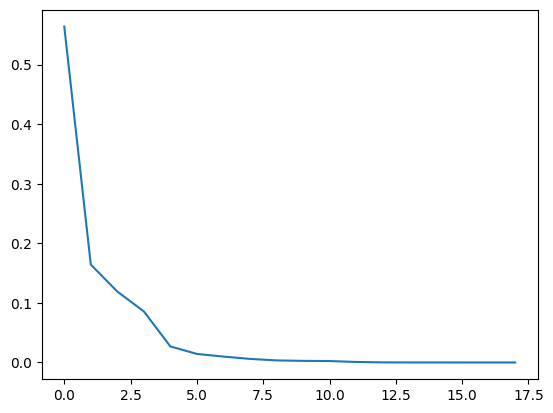

In [107]:
#Most of the variance seems to be captured by 
plt.plot(exp_var)

In [108]:
test_features=pca.transform(standardized_test_features)[:,:4]

In [109]:
test_features.shape

(957, 4)

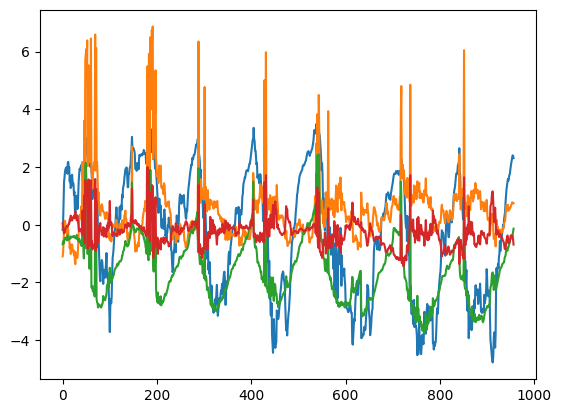

In [110]:
plt.plot(test_features)

In [111]:
regression=Ridge(alpha=10)

regression.fit(train_features[:,:4],y_train)

Ridge(alpha=10)

In [121]:
preds=regression.predict(test_features)
#Clip at zero
preds[preds<0]=0

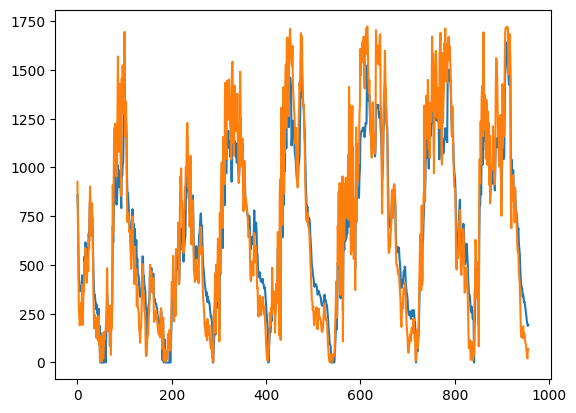

In [113]:
plt.plot(preds)
plt.plot(y_test)

In [114]:
np.corrcoef(preds.T,y_test.T)

array([[1.        , 0.96366993],
       [0.96366993, 1.        ]])

In [117]:
r2_score(y_test, preds)

0.897780074857662

In [136]:
#Regression with stronger regularization that sets unimportant variables to 0
l1_regr=Lasso()
l1_regr.fit(standardized_train_features,y_train)
preds=l1_regr.predict(standardized_test_features)
print(np.corrcoef(preds.T,y_test.T))
print(r2_score(y_test, preds))

[[1.         0.93166725]
 [0.93166725 1.        ]]
0.8530409820514286


/home/maria/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.924e+06, tolerance: 8.900e+05
  model = cd_fast.enet_coordinate_descent(
